# Method 1

In [1]:
from sympy import symbols, Function, Eq, dsolve, Derivative, solve

x = symbols('x')
v = Function('v')(x)
mu = 0.1
sigma = 0.15 ** 2  
a = 0.5
b = 3


ode = Eq(Derivative(v, x, x) * (sigma / 2) - Derivative(v, x) * mu, -1)


sol = dsolve(ode, v)


C1, C2 = symbols('C1 C2') 
general_solution = sol.rhs 

boundary_conditions = [general_solution.subs(x, a) - 0, general_solution.subs(x, b) - 0]
constants = solve(boundary_conditions, [C1, C2])

particular_solution = general_solution.subs(constants)

particular_solution


10.0*x - 6.55773442563799e-11*exp(8.88888888888889*x) - 4.99999999441592

#  Method 2

In [2]:
import numpy as np

mu = 0.1
sigma = 0.15
X0 = 2
a = 0.5  
b = 3 
dt = 0.01 
N = 1000 
T = 1000 

exit_times = []

for _ in range(N):
    X = X0
    t = 0
    for _ in range(T):
        dW = np.random.normal(0, np.sqrt(dt))
        X += mu * X * dt + sigma * dW  
        t += dt
        if X <= a or X >= b:
            exit_times.append(t)
            break


mean_exit_time = np.mean(exit_times)

mean_exit_time, len(exit_times)  

(4.172972972972928, 999)

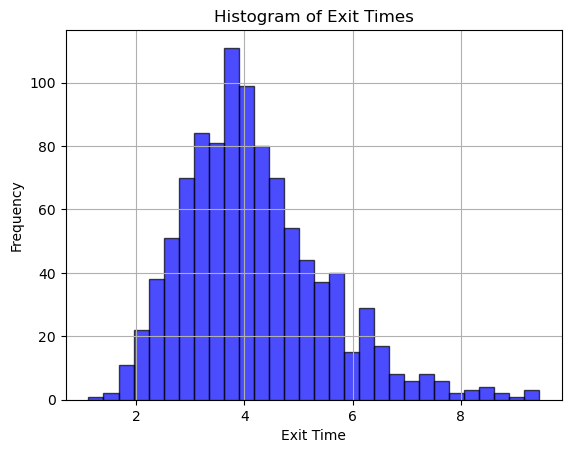

In [3]:
import matplotlib.pyplot as plt

plt.hist(exit_times, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Exit Times')
plt.xlabel('Exit Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
